In [203]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
from warnings import filterwarnings 

In [204]:
# Initializing clean csv file

cleanpath = Path('../csv/clean_data.csv')
file = pd.read_csv(cleanpath)
file.head()


,ID,SEX,TOTAL CHOLESTROL,AGE,SMOKING STATUS,CIGS PER DAY,EDUCATION,PREVALENT CHD,PERIOD,BMI
0,6238,F,250.0,46,NO,0,2,NO,1,28.73
1,6238,F,260.0,52,NO,0,2,NO,2,29.43
2,6238,F,237.0,58,NO,0,2,NO,3,28.50
3,11263,F,228.0,43,NO,0,2,NO,1,30.30
4,11263,F,230.0,49,NO,0,2,NO,2,31.36


In [205]:
##PSEUDO-CODING:
# FIRST) compare participant's SEX and their PREVCHD. (ID,SEX,PREVCHD, PERIOD==1)
#   cut down columns to ID, SEX, PREVCHD, PERIOD (sex_df)
#   Filter by (Period == 1)
#   Create a new df with Period == 3 to compare to P1.

# SECOND) display it in a graph (double bar graph OR pie graph to showcase which sex had more CHD.)
#   x_axis = np.arange(len(sexes) 
#   y_axis_chd = <df>
#       ADD CONIDITON: 'PREVALENT CHD' == 'YES'
#       chdyes = <df>.loc[<df>["PREVALENT CHD"]== 'YES',:].count() 
#   sexes = ['F','M']
#   colors= ['coral','lightblue']
#   plt.plot(x-axis, y-axis, color=colors, align = 'center' )
#   plt.xlabel("Sex")
#   plt.ylabel("Count of Prevalent CHD")
#   plt.show()

# THIRD) compare sex AND smoking with CHD.
#   new df, with followings columns: ID,SEX,PREVCHD, & SMOKING STATUS (sex_smoke_df)
#   filter by Period == 1
#   Compare to another filtered by Period == 3.

# FOURTH) Sex and CHOL and CHD


In [206]:
# The key focus in this segment is the subtopic: Sex and it's correlation with CHD

#Narrow down data set to relevant columns

sex_df = file[['ID','SEX','PREVALENT CHD','PERIOD']]
sex_df.head(10)

#filter by Period == 1

sex_p1 = pd.DataFrame()
sex_p1 = sex_df.loc[sex_df['PERIOD']==1,:]
sex_p1

sex_p1 = sex_p1[['ID','SEX','PREVALENT CHD']]

# filter to view totals among both sexes, with just ID, SEX AND CHD
#Seperated data by Sex and Period 1 only
#This section is mainly for debugging purposes, to make sure data is being filtered correctly.

female_p1 = sex_p1.loc[sex_p1['SEX']=='F',:]
female_p1

male_p1 = sex_p1.loc[sex_p1['SEX']=='M',:]
male_p1

#Once again split data further, by PREVALENT CHD (yes or no)

male_p1_chd= male_p1.loc[male_p1['PREVALENT CHD']=='YES',:]
male_p1_chd.count()

female_p1_chd = female_p1.loc[female_p1['PREVALENT CHD']=='YES',:]
female_p1_chd

### >>>> FINDINGS/OBSERVATIONS <<<<
#   2754 total rows count (P1)
#   1546 rows of FEMALES
#       25 w/ CHD
#   1208 rows of MALES (F>M)
#       39 with CHD (Fchd < F0)

#     so Mchd > Fchd, despite there being more females in the pool

,ID,SEX,PREVALENT CHD
420,556045,F,YES
426,571377,F,YES
717,870652,F,YES
1716,2080190,F,YES
1761,2134396,F,YES
1983,2408348,F,YES
2160,2646666,F,YES
2190,2682411,F,YES
2304,2839250,F,YES
2541,3117784,F,YES


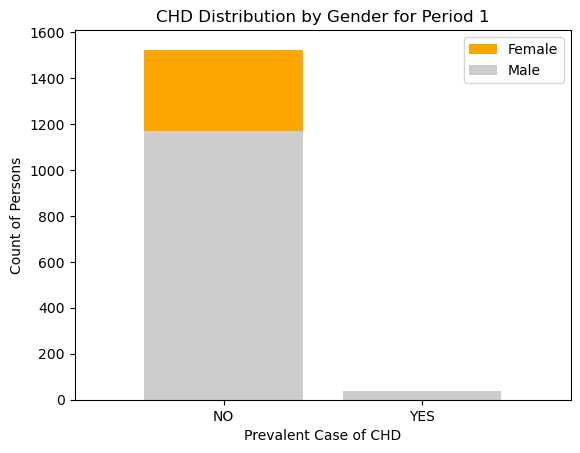

In [207]:
# PERIOD 1 PLOTTING: SEX AND CHD PREVALENCE

sexes = ['F','M']
yesorno = ['NO','YES']

female_axis=female_p1.groupby(['PREVALENT CHD'])['ID'].count()
female_axis

male_axis= male_p1.groupby(['PREVALENT CHD'])['ID'].count()
male_axis
                
# Double plotting for both sexes individually
plt.bar(sexes,female_axis,label='Female',color='orange',align='center')
plt.bar(sexes,male_axis,label='Male',color='0.80',align='center')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Gender for Period 1')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [208]:
# Now repeat steps from before but for data when PERIOD ==3 for comparison

#filtering by PERIOD == 3

sex_p3 = pd.DataFrame()
sex_p3 = sex_df.loc[sex_df['PERIOD']==3,:]
sex_p3

sex_p3 = sex_p3[['ID','SEX','PREVALENT CHD']]
sex_p3

female_p3 = sex_p3.loc[sex_p3['SEX']=='F',:]
female_p3

male_p3 = sex_p3.loc[sex_p3['SEX']=='M',:]
male_p3

#Once again split data further, by PREVALENT CHD (yes or no)

male_p3_chd= male_p3.loc[male_p3['PREVALENT CHD']=='YES',:]
male_p3_chd.count()

female_p3_chd = female_p3.loc[female_p3['PREVALENT CHD']=='YES',:]
female_p3_chd

##FINDINGS FOR PERIOD 3
#   2754 rows count (matches P1)
#   1546 count of FEMALES
#       127 W/CHD
#   1208 rows of MALES
#       173 W/ CHD

#   Pattern continues with Mchd > Fchd


,ID,SEX,PREVALENT CHD
101,134914,F,YES
155,199546,F,YES
194,228129,F,YES
254,344720,F,YES
263,359422,F,YES
...,...,...,...
8024,9689494,F,YES
8060,9746116,F,YES
8165,9868819,F,YES
8192,9906195,F,YES


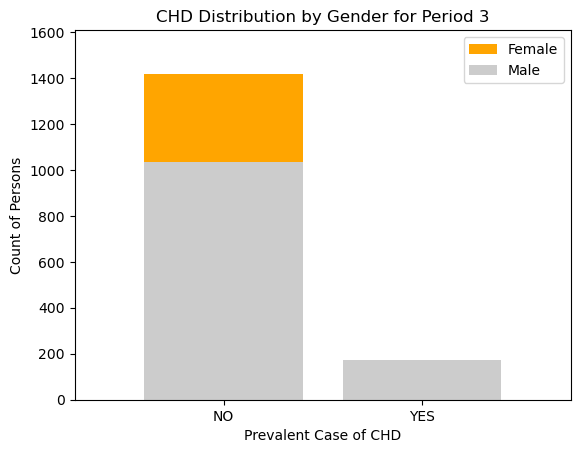

In [209]:
# PERIOD 3 PLOTTING: SEX AND CHD PREVALENCE

sexes = ['F','M']
yesorno = ['NO','YES']

female_axis2=female_p3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis2

male_axis2= male_p3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis2
                
# Double plotting for both sexes individually
plt.bar(sexes,female_axis2,label='Female',color='orange',align='center')
plt.bar(sexes,male_axis2,label='Male',color='0.80',align='center')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Gender for Period 3')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_p1['PREVALENT CHD']=='YES').count()+400)
plt.legend()
plt.show()

In [210]:
# SEX, SMOKING AND CHD 

# Creating a new dataframe with relevant columns
smoking_df = file[['ID','SEX','SMOKING STATUS','PREVALENT CHD','PERIOD']]
smoking_df.head()

# Split data by Period 1 and Period 3 
smoking_p1 = pd.DataFrame()
smoking_p1 = smoking_df.loc[smoking_df['PERIOD']==1,:]
smoking_p1

# Further filter by to only show rows where SMOKING STATUS == 'YES'
smoking_p1 = smoking_p1.loc[smoking_p1['SMOKING STATUS']=='YES',:]
smoking_p1


#   Checkpoint!
#   1299 = Total rows of smokers (F+M)

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
9,16365,M,YES,NO,1
15,24721,F,YES,NO,1
18,33077,M,YES,NO,1
21,34689,F,YES,NO,1
27,40435,F,YES,NO,1
...,...,...,...,...,...
8223,9939850,F,YES,NO,1
8235,9961615,M,YES,NO,1
8247,9973350,F,YES,NO,1
8250,9978986,F,YES,NO,1


In [211]:
# Debugging, to make sure data is being filtered correctly.


female_smp1 = smoking_p1.loc[smoking_p1['SEX']=='F',:]
female_smp1

male_smp1 = smoking_p1.loc[smoking_p1['SEX']=='M',:]
male_smp1

# #Once again split data further, by PREVALENT CHD (yes or no)

male_smp1_chd= male_smp1.loc[male_smp1['PREVALENT CHD']=='YES',:]
male_smp1_chd

female_smp1_chd = female_smp1.loc[female_smp1['PREVALENT CHD']=='YES',:]
female_smp1_chd

# >FINDINGS/ANALYSIS<
#   604 rows of Female smokers
#       4 female smokers w/ CHD
#   695 rows of Male smokers
#       20 male smokers w/ CHD
#
#    More Males smokers and more males with CHD.

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
1983,2408348,F,YES,YES,1
3231,3915943,F,YES,YES,1
4575,5610759,F,YES,YES,1
8058,9746116,F,YES,YES,1


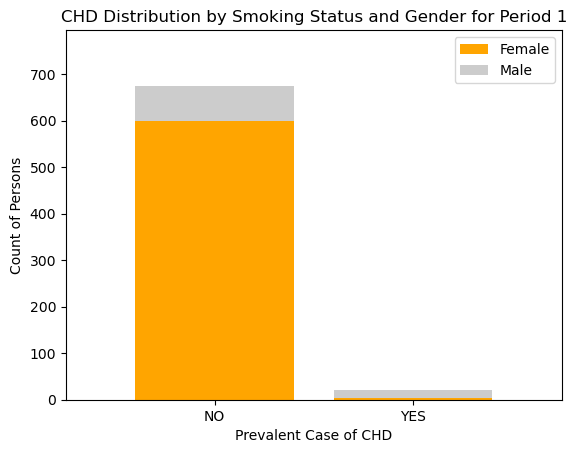

In [212]:
# PERIOD 1 PLOTTING: SMOKING, SEX AND CHD PREVALENCE

female_axis3=female_smp1.groupby(['PREVALENT CHD'])['ID'].count()
female_axis3

male_axis3= male_smp1.groupby(['PREVALENT CHD'])['ID'].count()
male_axis3
                
# Double plotting for both sexes individually
plt.bar(sexes,female_axis3,label='Female',color='orange',align='center',zorder=2)
plt.bar(sexes,male_axis3,label='Male',color='0.80',align='center')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Smoking Status and Gender for Period 1')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_smp1['PREVALENT CHD']=='YES').count()+100)
plt.legend()
plt.show()

In [213]:
# SEX, SMOKING AND CHD FOR PERIOD 3

smoking_p3 = pd.DataFrame()
smoking_p3 = smoking_df.loc[smoking_df['PERIOD']==3,:]
smoking_p3

# Filter by SMOKING STATUS == 'YES'

smoking_p3 = smoking_p3.loc[smoking_df['SMOKING STATUS']=='YES',:]
smoking_p3

#   Checkpoint!
#   934 total rows of smokers in P3
#      > Number of smokers dropped by nearly 400 from P1.

,ID,SEX,SMOKING STATUS,PREVALENT CHD,PERIOD
17,24721,F,YES,NO,3
20,33077,M,YES,NO,3
23,34689,F,YES,NO,3
29,40435,F,YES,NO,3
35,45464,F,YES,NO,3
...,...,...,...,...,...
8207,9920050,F,YES,NO,3
8210,9925133,F,YES,NO,3
8222,9938128,M,YES,NO,3
8237,9961615,M,YES,NO,3


In [214]:
# Debugging, to make sure data is being filtered correctly.


female_smp3 = smoking_p3.loc[smoking_p3['SEX']=='F',:]
female_smp3

male_smp3 = smoking_p3.loc[smoking_p3['SEX']=='M',:]
male_smp3

# #Once again split data further, by PREVALENT CHD (yes or no)

male_smp3_chd= male_smp3.loc[male_smp3['PREVALENT CHD']=='YES',:]
male_smp3_chd

female_smp3_chd = female_smp3.loc[female_smp3['PREVALENT CHD']=='YES',:]
female_smp3_chd.count()

# >FINDINGS/ANALYSIS<
#   469 rows of Female smokers
#       23 female smokers w/ CHD
#           (increased from 4 in P1)
#   465 rows of Male smokers
#       58 male smokers w/ CHD
#           (increased from 20 in P1)
#
#   Interestingly enough, there is also a drop in total smoker count in P3 compared to P1.
#   SAME PATTERN: More Males smokers and more mals with CHD.
# NEW!!.. more smokers got diagnosed with CHD by Period 3!!!!(a CORRELATION of smoking with CHD)

ID                23
SEX               23
SMOKING STATUS    23
PREVALENT CHD     23
PERIOD            23
dtype: int64

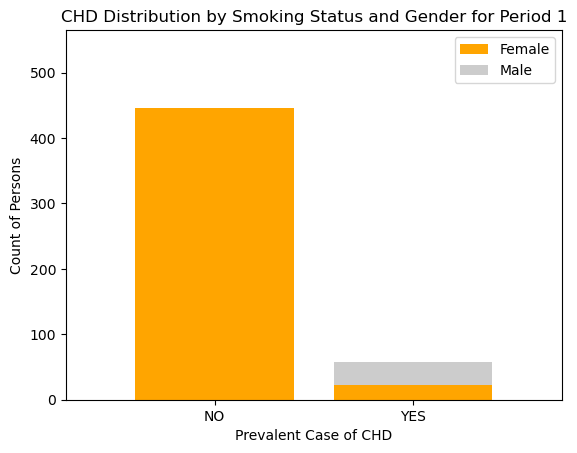

In [215]:
# PERIOD 3 PLOTTING: SMOKING, SEX AND CHD PREVALENCE

female_axis4=female_smp3.groupby(['PREVALENT CHD'])['ID'].count()
female_axis4

male_axis4= male_smp3.groupby(['PREVALENT CHD'])['ID'].count()
male_axis4
                
# Double plotting for both sexes individually
plt.bar(sexes,female_axis4,label='Female',color='orange',align='center',zorder=2)
plt.bar(sexes,male_axis4,label='Male',color='0.80',align='center')

tick_locations = [value for value in sexes]
plt.xticks(tick_locations, yesorno)

plt.title('CHD Distribution by Smoking Status and Gender for Period 1')
plt.xlabel("Prevalent Case of CHD")
plt.ylabel("Count of Persons")
plt.xlim(-0.75,len(sexes)-0.25)
plt.ylim(0,(male_smp3['PREVALENT CHD']=='YES').count()+100)
plt.legend()
plt.show()

In [216]:
# compare now by smoking intensity? CIGS-PER-DAY for smokers, by sex and chd distribution?

In [217]:
# SEX, CHOLESTROL AND CHD CORRELATION

#Create a new dataframe with relevant columns

chol_df = file[['ID','SEX','TOTAL CHOLESTROL','PREVALENT CHD','PERIOD']]
chol_df.count()


ID                  8262
SEX                 8262
TOTAL CHOLESTROL    8262
PREVALENT CHD       8262
PERIOD              8262
dtype: int64

In [218]:
# Bin Cholestrol into readable groups [high, low, normal] (PRE-SEPERATING INTO PERIODS)

# CHOLESTROL LEVELS 
# < 120 = abnormally low
# 120-200 = healthy
#  200-239 =  at risk
# 240+ = abnormally high

#NOTE: 113.0 is the lowest cholestrol value in Period 1.
# and 464.0 is the highest in p1, 638 max in all periods.

bins = [0, 119.9,199.9,239,float('inf')]

bin_names = ['abnormally low','healthy','at risk','abnormally high']

#Slicing our data in bins

chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,
                                     labels=bin_names,include_lowest=True)

chol_df.head()

/var/folders/nn/b8z30mj97x5gtqchz10dmh4w0000gn/T/ipykernel_9171/2914744785.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chol_df['CHOLESTROL LEVEL'] = pd.cut(chol_df['TOTAL CHOLESTROL'],bins,


,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,PERIOD,CHOLESTROL LEVEL
0,6238,F,250.0,NO,1,abnormally high
1,6238,F,260.0,NO,2,abnormally high
2,6238,F,237.0,NO,3,at risk
3,11263,F,228.0,NO,1,at risk
4,11263,F,230.0,NO,2,at risk


In [253]:
# Filter by Period 1 only

chol_p1 = chol_df.loc[chol_df['PERIOD']==1,:]
chol_p1

# Filter again by PREVALENCT CHD=='YES'

chol_p1 = chol_p1.loc[chol_p1['PREVALENT CHD']=='YES',:]
chol_p1

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,PERIOD,CHOLESTROL LEVEL
54,68397,M,227.0,YES,1,at risk
177,208566,M,288.0,YES,1,abnormally high
312,428306,M,265.0,YES,1,abnormally high
420,556045,F,194.0,YES,1,healthy
426,571377,F,320.0,YES,1,abnormally high
...,...,...,...,...,...,...
8058,9746116,F,186.0,YES,1,healthy
8112,9802787,M,218.0,YES,1,at risk
8142,9838321,M,215.0,YES,1,at risk
8163,9868819,F,252.0,YES,1,abnormally high


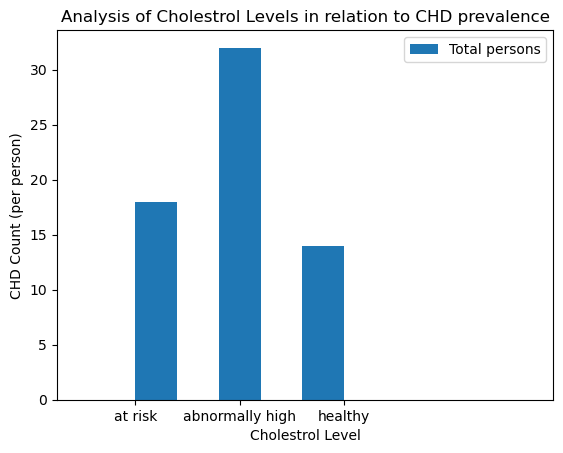

In [266]:
# Plotting Histogram of Cholestrol levels in relation to CHD prevalence

plt.hist(chol_p1['CHOLESTROL LEVEL'],bins=5,align='mid',label = 'Total persons')

plt.xlabel('Cholestrol Level')
plt.ylabel('CHD Count (per person)')
plt.xlim(-0.75,len(bin_names))
plt.title('Analysis of Cholestrol Levels in relation to CHD prevalence')
plt.legend()
plt.show()

#one bin missing??
#gta make it in order
#alignment kinda weird..


In [271]:
#now do above, by sex

chol_fm = chol_p1.loc[chol_p1['SEX']=='F',:]
chol_fm
#25 females, all with CHD

chol_m = chol_p1.loc[chol_p1['SEX']=='M',:]
chol_m
#39 males, w/ chd

,ID,SEX,TOTAL CHOLESTROL,PREVALENT CHD,PERIOD,CHOLESTROL LEVEL
54,68397,M,227.0,YES,1,at risk
177,208566,M,288.0,YES,1,abnormally high
312,428306,M,265.0,YES,1,abnormally high
897,1075504,M,266.0,YES,1,abnormally high
903,1080397,M,222.0,YES,1,at risk
1476,1778003,M,225.0,YES,1,at risk
1731,2097493,M,199.0,YES,1,healthy
2034,2474378,M,183.0,YES,1,healthy
2040,2483517,M,294.0,YES,1,abnormally high
2286,2807106,M,240.0,YES,1,abnormally high


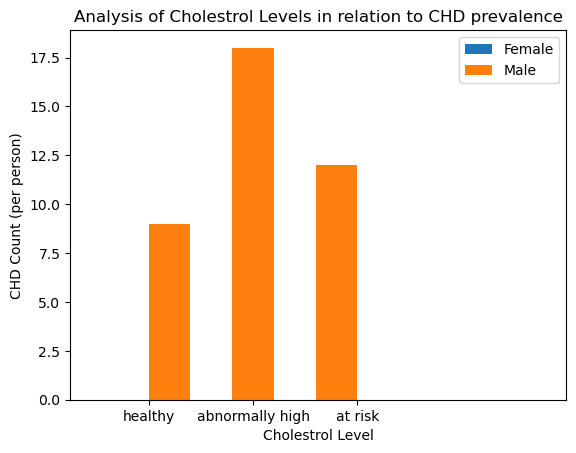

In [272]:
# Plotting Histogram of Cholestrol levels in relation to CHD prevalence BY SEX

plt.hist(chol_fm['CHOLESTROL LEVEL'],bins=5,align='mid',label = 'Female')
plt.hist(chol_m['CHOLESTROL LEVEL'],bins=5,align='mid',label = 'Male')

plt.xlabel('Cholestrol Level')
plt.ylabel('CHD Count (per person)')
plt.xlim(-0.75,len(bin_names))

plt.title('Analysis of Cholestrol Levels in relation to CHD prevalence')
plt.legend()
plt.show()

In [ ]:
#CHI TEST BY CHOL AND CHD

 
#